In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# 估算根号2
x = 2*np.random.uniform(0,1,1000000)
 
x_sq = x**2;
 
makers = (x_sq<=2);

est_sqrt_2 = 2*np.sum(makers)/len(x_sq);
# percentage of error
err = (est_sqrt_2 - np.sqrt(2))/np.sqrt(2)*100; 
print(err)

-0.06304297998663712


69.69332237790577
67.0525515399776


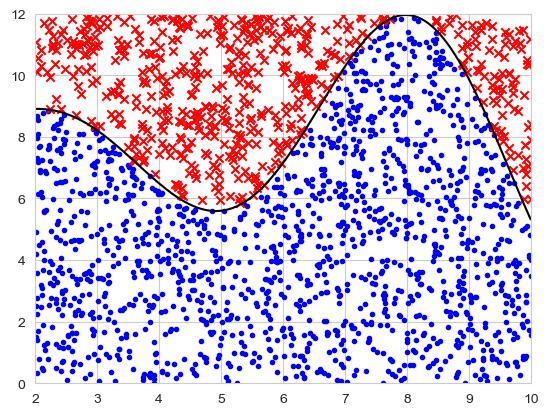

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 估算积分

num = 2000
x1 = 2
x2 = 10

def f(x):
    return x*np.sin(x)/2 + 8

x = np.arange(x1, x2, 0.01)
y = f(x)
fmax = np.max(y)

x_rand = x1 + (x2 - x1)*np.random.random(num)
y_rand = np.random.random(num)*fmax

ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))

fig, ax = plt.subplots()

# 绘制散点图
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "b", marker = '.')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "r", marker = 'x')

plt.plot(x, y, color = "k")
# plt.tight_layout()
plt.xlim(2,10)
plt.ylim(0,12)

estimated_area = np.sum(y_rand < f(x_rand))/num*fmax*(x2 - x1)
print(estimated_area)

from scipy.integrate import quad  # 计算单变量的数值积分
integral = quad(f, x1, x2)
print(integral[0])

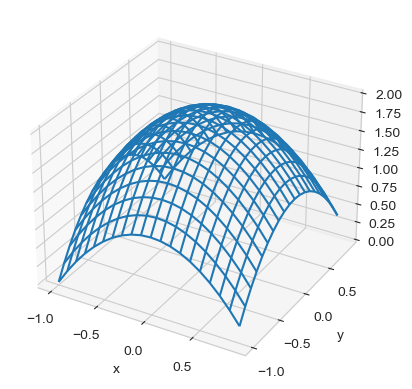

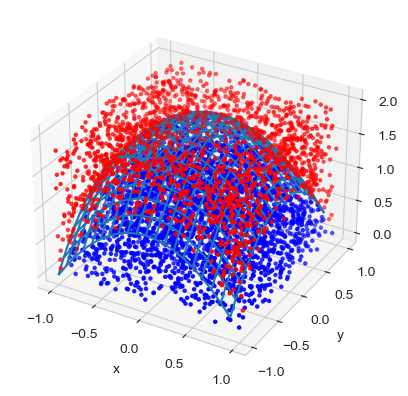

5.4032
5.333333333333333


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# 估算体积

def f(x,y):
    return 2 - x**2 - y**2

x = np.arange(-1, 1, 0.1)

# 生成坐标
[X,Y] = np.meshgrid(x,x);
 
Z = f(X,Y)
 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot wireframe.
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# 随机点数量
num_rnd = 5000;
x_rand = 2*np.random.random(num_rnd) - 1;  # -1 ~ 1
y_rand = 2*np.random.random(num_rnd) - 1;
z_rand = 2*np.random.random(num_rnd);      # 0 ~ 2

ind_below = np.where(z_rand < f(x_rand,y_rand))  
ind_above = np.where(z_rand >= f(x_rand,y_rand))
 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_rand[ind_below], y_rand[ind_below], z_rand[ind_below],
            color = "b", marker = '.')
ax.scatter3D(x_rand[ind_above], y_rand[ind_above], z_rand[ind_above],
            color = "r", marker = '.')

# Plot wireframe.
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

estimated_volume = np.sum(z_rand < f(x_rand,y_rand))/num_rnd*8
print(estimated_volume)

from scipy import integrate

double_integral = integrate.dblquad(f, -1, 1, lambda x: -1, lambda x: 1)
print(double_integral[0])

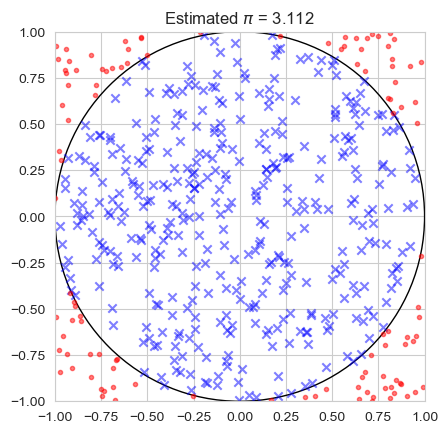

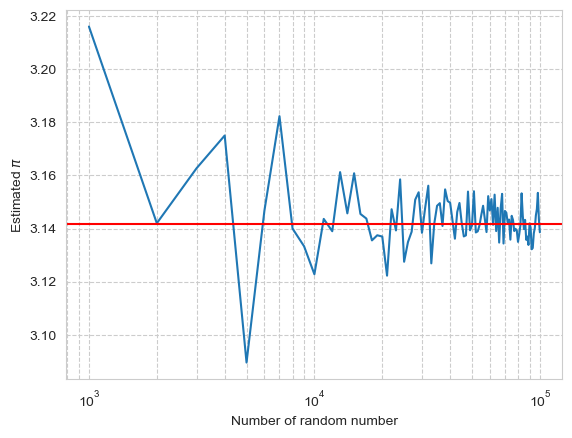

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 生成均匀分布的数据点
X = np.random.uniform(-1, 1, size = (500,2))
x = X[:,0]
y = X[:,1]

masks = np.sqrt(x**2 + y**2) < 1

pi_est = 4 * sum(masks)/len(x)

fig, ax = plt.subplots()

# plot a unit circle
circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')
ax.add_patch(circ)

# plot data inside the circle
plt.scatter(x[masks], y[masks], marker="x", alpha=0.5, color = 'b')

# plot data outside the circle
# ~ 表示取反
plt.scatter(x[~masks], y[~masks], marker=".", alpha=0.5, color = 'r')
plt.axis('scaled')
plt.title('Estimated $\pi$ = %1.3f' %(pi_est))
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# define a function of estimating pi

def est_pi(n):
    X = np.random.uniform(-1, 1, size = (int(n),2))
    x = X[:,0]
    y = X[:,1]
    
    masks = np.sqrt(x**2 + y**2) < 1
    
    pi_est = 4 * sum(masks)/len(x)
    
    return pi_est

n_array = np.linspace(1000,1000*100,100)

est_pi_array = np.empty(len(n_array))

# convergence of estimated pi

i = 0
for n in n_array:
    pi_est = est_pi(n)
    est_pi_array[i] = pi_est
    i = i + 1

fig, ax = plt.subplots()

plt.semilogx(n_array, est_pi_array)
plt.xlabel("Number of random number")
plt.ylabel("Estimated $\pi$")
plt.axhline(np.pi, color="r");

plt.grid(True, which="both", ls="--")

3.1847133757961785


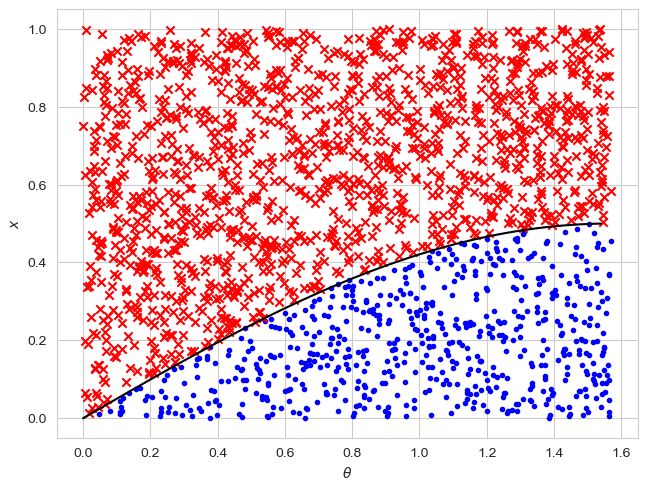

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 布丰投针

# 针的长度
l = 1
# 两条线之间的距离
# length of needles
t = 2
# distance between parallel lines

# 针的数量
num = 2000
# 角度
theta_1 = 0
theta_2 = np.pi/2

def f(theta):
    return np.sin(theta)/2
# 针尖到中心的距离

# 角度数组
theta_array = np.arange(theta_1, theta_2, np.pi/100)
x_array = f(theta_array)

# 针的中心距离线的最大值
x_max = t/2

# 随机投针
# 随机产生角度
theta_rand = theta_1 + (theta_2 - theta_1)*np.random.random(num)
# 随机指定针的中心到线的距离
x_rand = np.random.random(num)*x_max

ind_below = np.where(x_rand < f(theta_rand))
ind_above = np.where(x_rand >= f(theta_rand))


fig, ax = plt.subplots()

plt.scatter(theta_rand[ind_below], x_rand[ind_below], 
            color = "b", marker = '.')
plt.scatter(theta_rand[ind_above], x_rand[ind_above], 
            color = "r", marker = 'x')
plt.plot(theta_array, x_array, color = "k")
plt.tight_layout()
plt.xlabel('$\u03B8$')
plt.ylabel('$x$')

# 估算 pi
estimated_pi = num/np.sum(x_rand < f(theta_rand))*2*l/t
print(estimated_pi)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [ -1.   1.   1.  -1.  -1.   1.  -1.   1.   1.  -1.   1.  -1.  -1.   1.
   -1.  -1.  -1.   1.   1.   1.]
 [  0.   2.   0.   0.  -2.   2.  -2.   2.   0.  -2.   0.   0.  -2.   0.
   -2.   0.   0.   2.   2.   2.]
 [ -1.   1.   1.  -1.  -1.   3.  -3.   1.  -1.  -3.  -1.  -1.  -1.  -1.
   -3.  -1.   1.   1.   1.   1.]
 [ -2.   0.   2.  -2.  -2.   2.  -2.   0.   0.  -4.   0.  -2.   0.   0.
   -2.  -2.   0.   0.   0.   0.]
 [ -3.  -1.   1.  -1.  -3.   1.  -3.  -1.  -1.  -3.  -1.  -1.  -1.   1.
   -3.  -3.  -1.  -1.   1.  -1.]
 [ -2.  -2.   2.   0.  -4.   0.  -4.  -2.  -2.  -2.  -2.   0.   0.   0.
   -2.  -4.   0.  -2.   2.   0.]
 [ -1.  -3.   3.   1.  -5.   1.  -5.  -3.  -1.  -3.  -1.  -1.  -1.  -1.
   -3.  -5.  -1.  -1.   3.  -1.]
 [  0.  -4.   2.   2.  -4.   2.  -6.  -2.   0.  -2.  -2.   0.  -2.   0.
   -4.  -4.   0.  -2.   2.  -2.]
 [  1.  -5.   3.   3.  -3.   3.  -7.  -3.   1.  -3.  -3

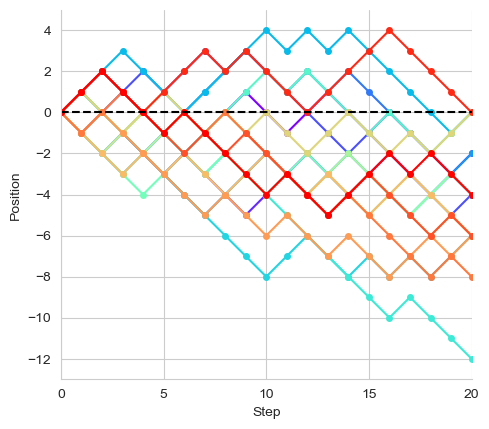

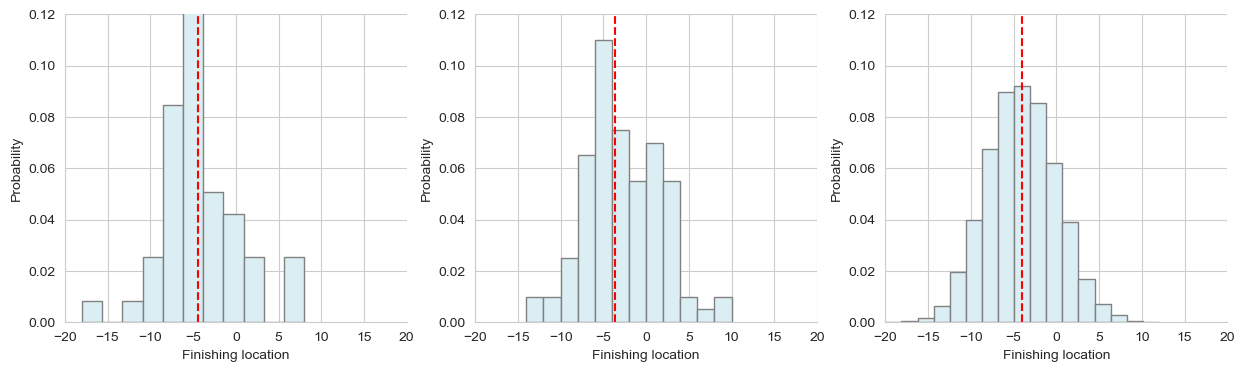

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
from matplotlib import cm


def generate_paths(step_num, path_num, p, up_down):
    '''生成随机路径'''
        
    np.random.seed(0)
    
    # 创建 0 数组纪律路径起始位置
    start_locs = np.zeros((1, path_num))

    # random walk
    # 形状元组
    step_shape = (step_num, path_num)

    # 生成路径数组
    steps = np.random.choice(a=up_down, size=step_shape, p=p)
    
    # 路径信息
    paths = np.concatenate([start_locs, steps]).cumsum(0)

    return paths


up_down = [-1, 1]

p = 0.4  # probability of moving up
probs = [1 - p, p]

step_num = 20  # n in binomial distribution

path_num = 20

colors = plt.cm.rainbow(np.linspace(0, 1, path_num))

# generate random paths
paths = generate_paths(step_num, path_num, probs, up_down)
print(paths)
fig, ax = plt.subplots()

for i in np.arange(0, path_num):
    plt.plot(np.arange(step_num + 1), paths[:, i],
             marker='.', markersize=8, color=colors[i, :]);


plt.xlabel('Step')
plt.ylabel('Position')
plt.axis('scaled')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

ax.set_xlim(0, step_num)
plt.xticks(np.arange(0, step_num + 1, 5))

ax.set_ylim(np.floor(paths.min()) - 1,
            np.ceil(paths.max()) + 1)

plt.axhline(y=0, linestyle='--', color='k')

fig, axes = plt.subplots(1, 3, figsize=(15, 4),
                         gridspec_kw={'width_ratios': [1, 1, 1]})

for i, path_num in enumerate([50, 100, 5000]):
    
    paths = generate_paths(step_num, path_num, probs, up_down)
    # 路径终点
    stop_locs = paths[-1, :]

    plt.sca(axes[i])
    plt.hist(stop_locs, bins=len(np.unique(stop_locs)),
             density=True, edgecolor='grey',
             color='#DBEEF3')

    plt.xlim(-step_num, step_num)
    plt.axvline(x=stop_locs.mean(), linestyle='--', color='r')

    plt.xlabel('Finishing location')
    plt.ylabel('Probability')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.ylim(0, 0.12)

(0.0, 0.2)

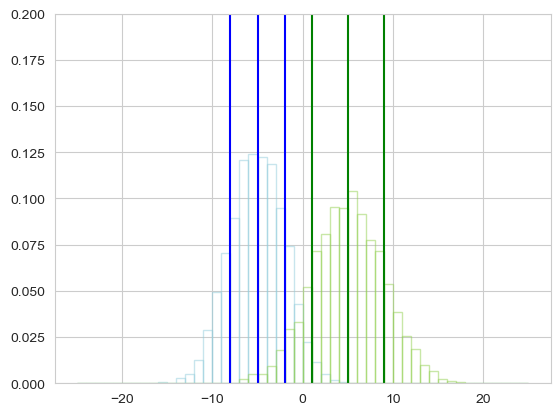

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu_X1, sigma_X1 = -5, 3
mu_X2, sigma_X2 = 5, 4

rho = 0.5

# 平均值
MU = [mu_X1, mu_X2]
# 协方差矩阵
SIGMA = [[sigma_X1 ** 2, sigma_X1 * sigma_X2 * rho],
         [sigma_X1 * sigma_X2 * rho, sigma_X2 ** 2]]

# 产生多元正态分布数据
X_12 = np.random.multivariate_normal(MU, SIGMA, 5000)
X1 = X_12[:, 0]
X2 = X_12[:, 1]

fig, ax = plt.subplots()

plt.hist(X1, bins=50, range=[-25, 25],
         density=True, facecolor="None",
         edgecolor='#92CDDC', alpha=0.5)

plt.axvline(x=mu_X1, color='b')
plt.axvline(x=mu_X1 - sigma_X1, color='b')
plt.axvline(x=mu_X1 + sigma_X1, color='b')

plt.hist(X2, bins=50, range=[-25, 25],
         density=True, facecolor="None",
         edgecolor='#92D050', alpha=0.5)

plt.axvline(x=mu_X2, color='g')
plt.axvline(x=mu_X2 - sigma_X2, color='g')
plt.axvline(x=mu_X2 + sigma_X2, color='g')

plt.ylim(0, 0.2)


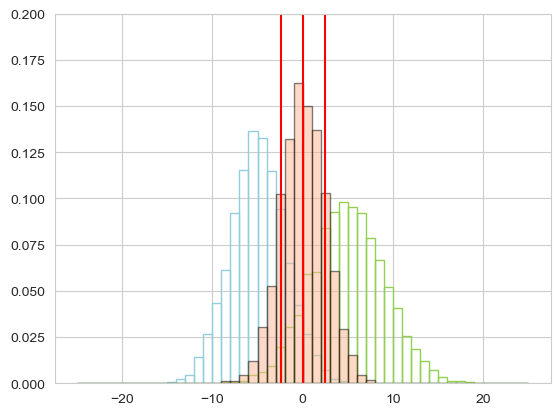

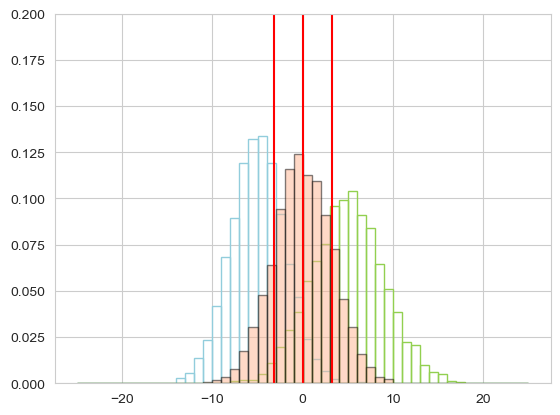

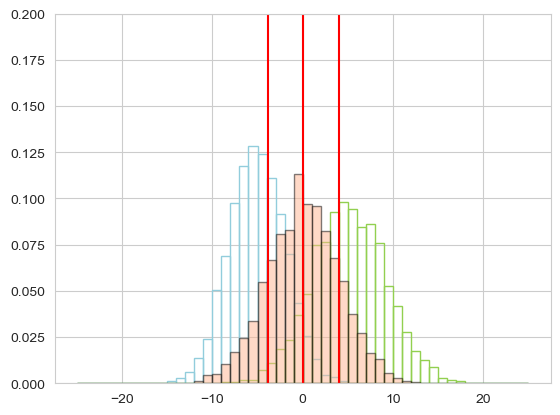

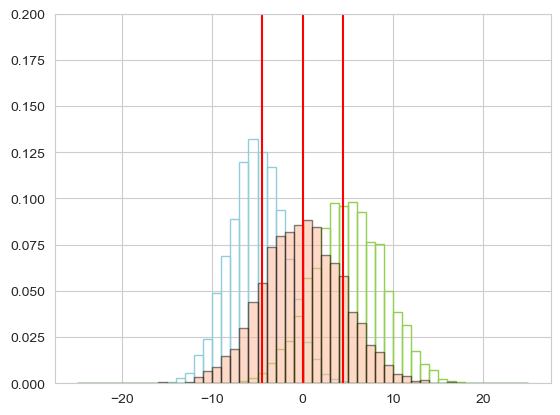

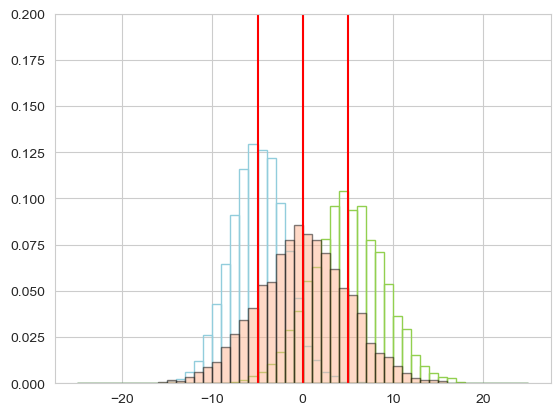

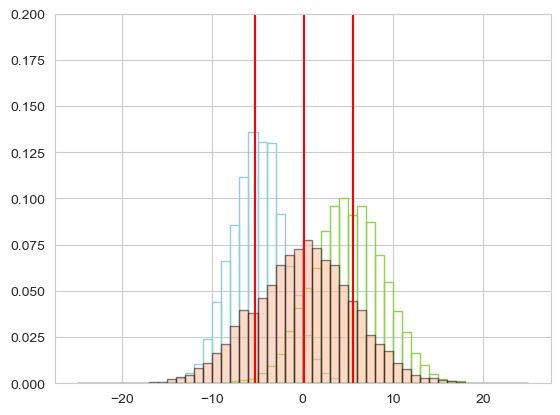

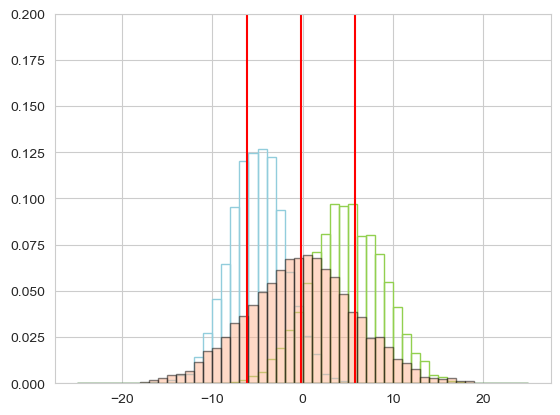

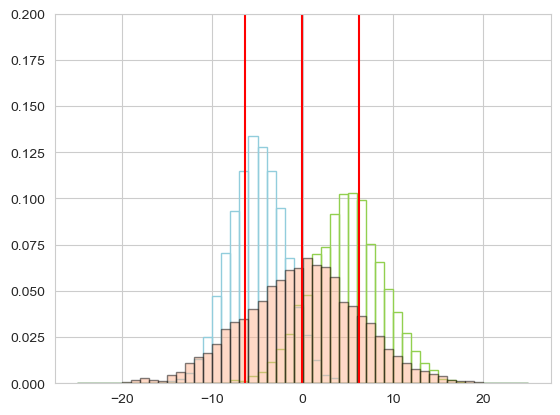

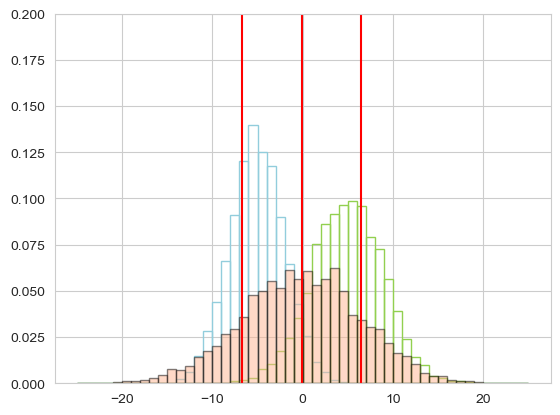

In [5]:
for rho in [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]:
    
    MU = [mu_X1, mu_X2]
    SIGMA = [[sigma_X1 ** 2, sigma_X1 * sigma_X2 * rho],
             [sigma_X1 * sigma_X2 * rho, sigma_X2 ** 2]]

    X_12 = np.random.multivariate_normal(MU, SIGMA, 5000)
    X1 = X_12[:, 0]
    X2 = X_12[:, 1]

    Y = X1 + X2

    fig, ax = plt.subplots()

    plt.hist(X1, bins=50, range=[-25, 25],
             density=True, facecolor="None",
             edgecolor='#92CDDC')

    plt.hist(X2, bins=50, range=[-25, 25],
             density=True, facecolor="None",
             edgecolor='#92D050')

    plt.hist(Y, bins=50, range=[-25, 25],
             density=True, color='#FFB591',
             edgecolor='k', alpha=0.5)

    plt.axvline(x=Y.mean(), color='r')
    plt.axvline(x=Y.mean() - Y.std(), color='r')
    plt.axvline(x=Y.mean() + Y.std(), color='r')
    plt.ylim(0, 0.2)

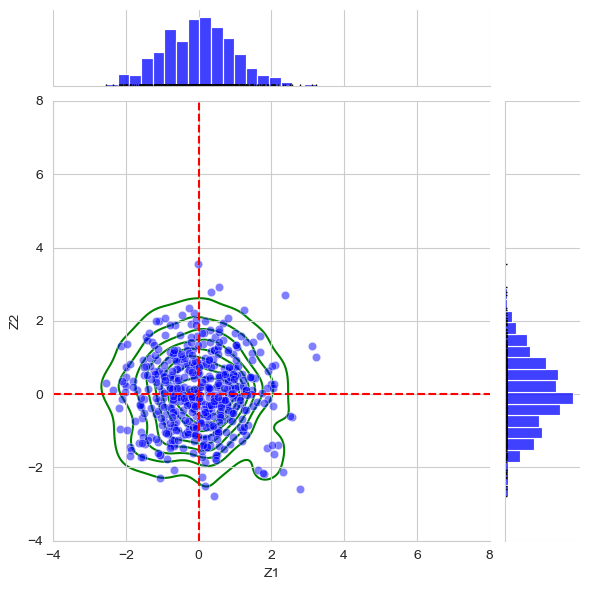

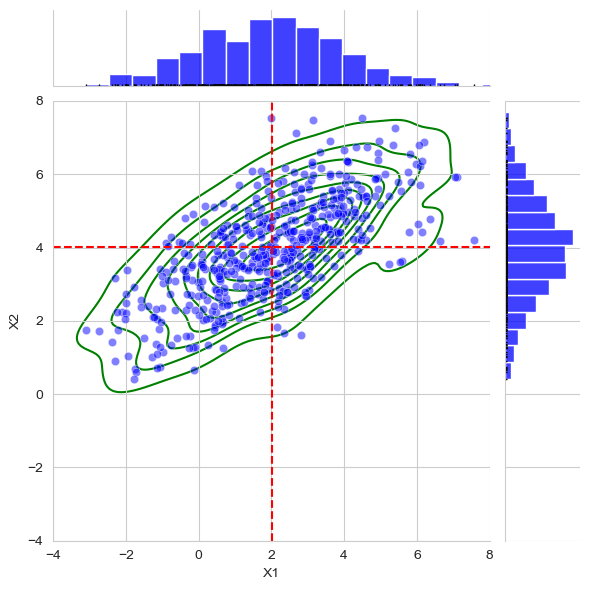

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mu_z = [0, 0]
SIGMA_z = [[1, 0], [0, 1]]
# diagonal covariance

# 生成数据
z1, z2 = np.random.multivariate_normal(mu_z, SIGMA_z, 500).T
Z = np.matrix([z1, z2]).T
# IID standard normal


Z_df = pd.DataFrame(data=Z, columns=["Z1", "Z2"])

g = sns.jointplot(data=Z_df, x='Z1', y='Z2',
                  alpha=0.5, color='b',
                  xlim=(-4, 8), ylim=(-4, 8))

g.plot_joint(sns.kdeplot, color="g", zorder=0, fill=False)
g.plot_marginals(sns.rugplot, color="k")

g.ax_joint.axvline(x=Z_df.mean()['Z1'], color='r', linestyle='--')
g.ax_joint.axhline(y=Z_df.mean()['Z2'], color='r', linestyle='--')

#   generate multivariate normal random numbers
# 产生特定相关性的随机数

E_X = [2, 4]
SIGMA_X = [[4, 2], [2, 2]]

# x1, x2 = np.random.multivariate_normal(E_x, SIGMA_x, 500).T

# Cholesky 分解
L = np.linalg.cholesky(SIGMA_X)
R = L.T

X_Chol = Z @ R + np.matrix([E_X])

X_Chol_df = pd.DataFrame(data=X_Chol, columns=["X1", "X2"])

g = sns.jointplot(data=X_Chol_df, x='X1', y='X2',
                  alpha=0.5, color='b',
                  xlim=(-4, 8), ylim=(-4, 8))

g.plot_joint(sns.kdeplot, color="g", zorder=0, fill=False)
g.plot_marginals(sns.rugplot, color="k")
g.ax_joint.axvline(x=X_Chol_df.mean()['X1'], color='r', linestyle='--')
g.ax_joint.axhline(y=X_Chol_df.mean()['X2'], color='r', linestyle='--')

[[5.84333333]
 [3.05733333]
 [3.758     ]
 [1.19933333]]


ValueError: 'Blues_d' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

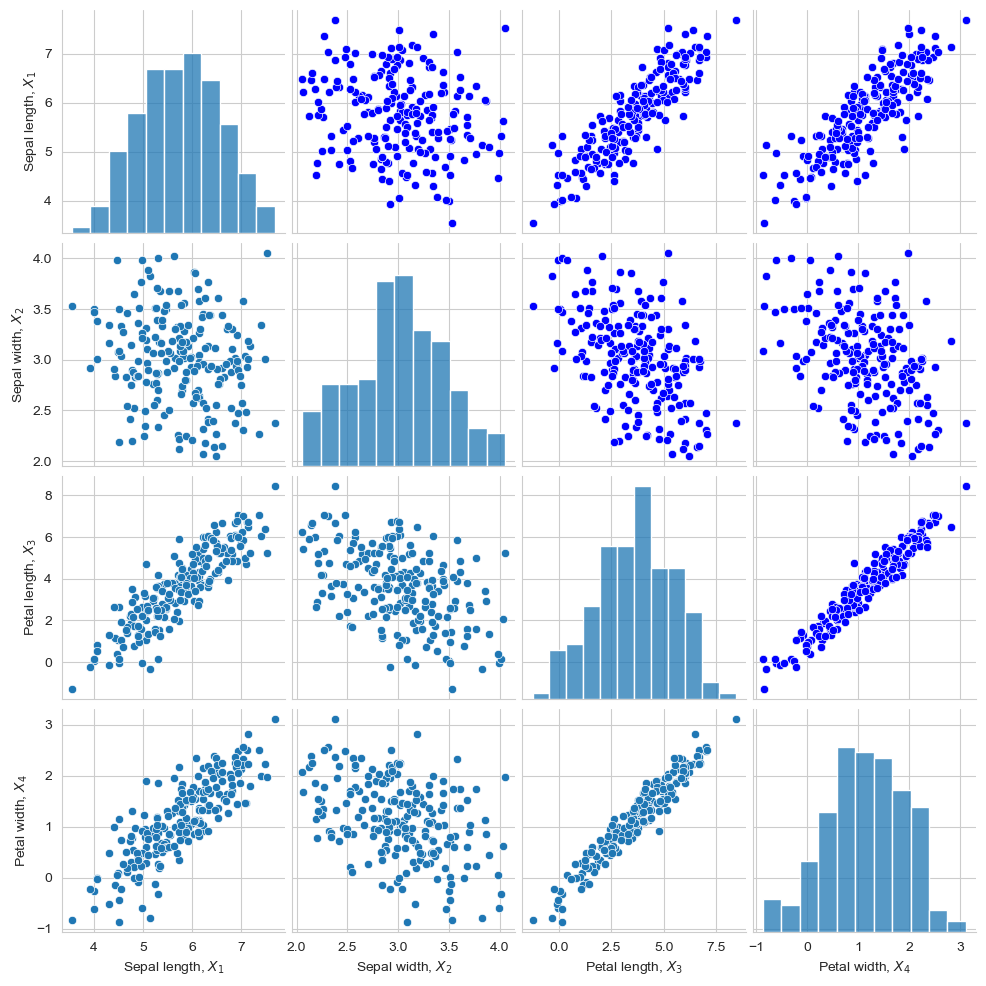

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris
from scipy.stats import norm
import scipy
import seaborn as sns


iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

x_array = np.linspace(0,8,100)
# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

MU = X_df.mean()
MU = np.array([MU]).T
print(MU)

SIGMA = X_df.cov()

# random data generator

from scipy.stats import multivariate_normal

# 创建多维正态分布对象
multi_norm = multivariate_normal(MU[:,0], np.array(SIGMA))

# 生成随机数数量
num_rand = 200
# 生成随机样本
X_rand = multi_norm.rvs(num_rand)

X_rand_df = pd.DataFrame(X_rand, columns = X_df.columns)


# without class labels
g = sns.pairplot(X_rand_df)
g.map_upper(sns.scatterplot, color = 'b')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_d") 
g.map_diag(sns.distplot, kde=False, color = 'b')

[-5, 5]